In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Load the overdose data
file_path = "/Users/hunterberberich/Desktop/Data/vis_df.csv"
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


In [43]:
print(df.dtypes)
df

date                     datetime64[ns]
tempmax                         float64
tempmin                         float64
temp                            float64
feelslikemax                    float64
feelslikemin                    float64
feelslike                       float64
dew                             float64
humidity                        float64
precip                          float64
precipcover                     float64
preciptype                       object
snow                            float64
snowdepth                       float64
cloudcover                      float64
uvindex                           int64
severerisk                      float64
day                              object
gender_desc                      object
race                             object
susp_od_drug_desc                object
naloxone_administered            object
survive                          object
month                             int32
year                              int32


,date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,uvindex,severerisk,day,gender_desc,race,susp_od_drug_desc,naloxone_administered,survive,month,year
0,2018-01-07,26.2,-4.2,10.1,18.1,-16.6,0.6,-3.8,57.2,0.000,...,2,0.0,Sunday,Male,BLACK,HEROIN,N,Y,1,2018
1,2018-01-09,35.8,28.0,32.5,34.7,24.1,26.8,26.6,78.9,0.000,...,2,0.0,Tuesday,Male,WHITE,HEROIN,Y,Y,1,2018
2,2018-01-14,15.3,2.5,9.2,14.6,-6.0,3.5,0.5,68.0,0.000,...,2,0.0,Sunday,Male,WHITE,HEROIN,Y,Y,1,2018
3,2018-01-14,15.3,2.5,9.2,14.6,-6.0,3.5,0.5,68.0,0.000,...,2,0.0,Sunday,Male,WHITE,HEROIN,Y,Y,1,2018
4,2018-01-14,15.3,2.5,9.2,14.6,-6.0,3.5,0.5,68.0,0.000,...,2,0.0,Sunday,Male,WHITE,HEROIN,Y,Y,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,2024-04-11,68.8,58.9,61.6,68.8,58.9,61.6,56.7,84.8,1.526,...,3,10.0,Thursday,Female,BLACK,FENTANYL,Y,U,4,2024
3680,2024-04-12,59.4,46.8,50.8,59.4,39.8,46.5,46.3,84.5,0.266,...,2,10.0,Friday,Female,WHITE,HEROIN,Y,Y,4,2024
3681,2024-04-13,59.2,44.5,51.1,59.2,37.4,47.9,33.0,51.5,0.019,...,9,10.0,Saturday,Male,WHITE,HEROIN,Y,Y,4,2024
3682,2024-04-14,81.1,45.0,64.1,79.9,39.9,62.9,39.5,42.6,0.001,...,8,30.0,Sunday,Male,WHITE,HEROIN,Y,Y,4,2024


In [44]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
df2 = df.drop(columns=['date', 'month', 'year'])

In [46]:
key_variables = ['tempmax', 'tempmin', 'feelslike', 'humidity', 'precip', 'cloudcover']

In [47]:
five_number_summary2 = df[key_variables].describe().loc[['min', '25%', '50%', '75%', 'max']]
print(five_number_summary2)

     tempmax  tempmin  feelslike  humidity  precip  cloudcover
min     11.4   -5.000      -13.2    26.000  0.0000       0.000
25%     48.5   32.800       35.7    60.075  0.0000      30.175
50%     66.8   47.500       56.0    70.450  0.0050      55.900
75%     78.6   61.625       69.7    79.700  0.1105      80.700
max     93.7   75.500       87.2    99.200  3.9220     100.000


<Figure size 1400x700 with 0 Axes>

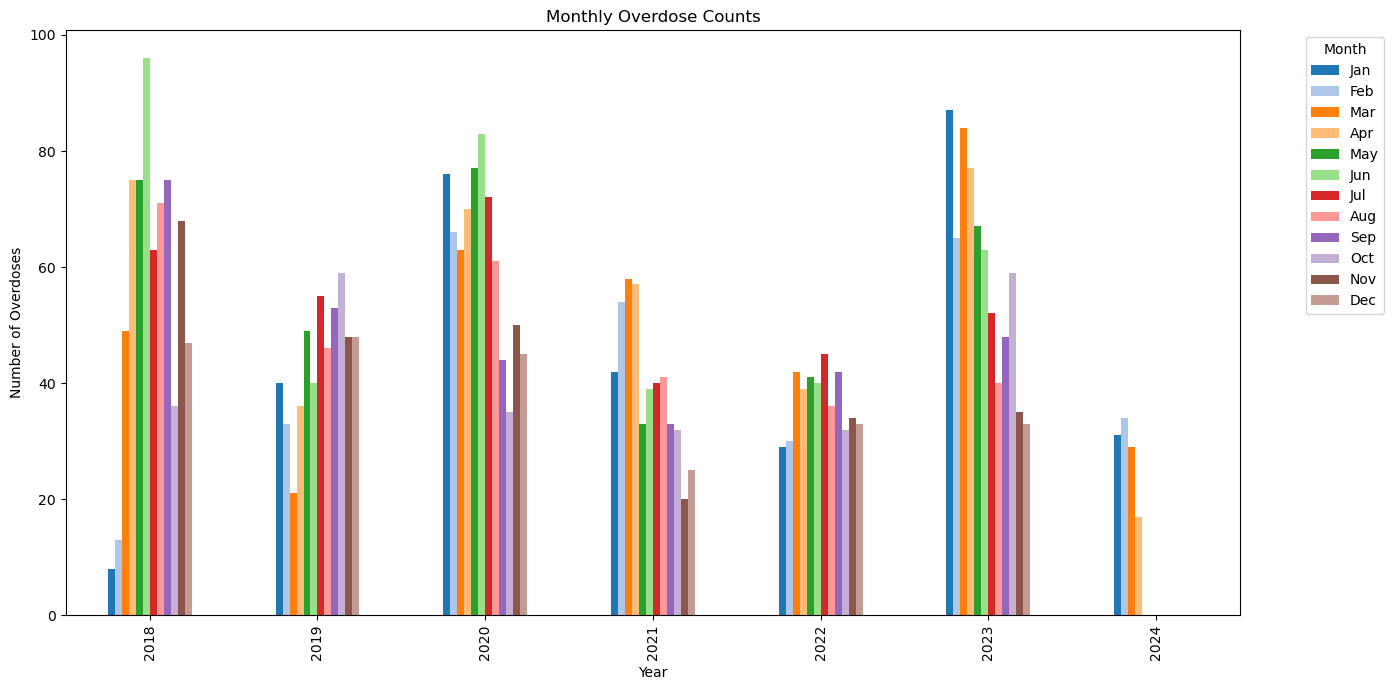

In [48]:

monthly_counts = df.groupby(['year', 'month']).size().unstack(fill_value=0)
monthly_counts.columns = [calendar.month_abbr[m] for m in monthly_counts.columns]  


plt.figure(figsize=(14, 7))
colors = plt.cm.tab20.colors  # Using tab20 colormap
monthly_counts.plot(kind='bar', stacked=False, figsize=(14, 7), color=colors)
plt.title('Monthly Overdose Counts')
plt.xlabel('Year')
plt.ylabel('Number of Overdoses')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
top_days = df['date'].value_counts().nlargest(3)

print(top_days)



date
2018-04-20    11
2018-11-30    11
2023-01-07    10
Name: count, dtype: int64


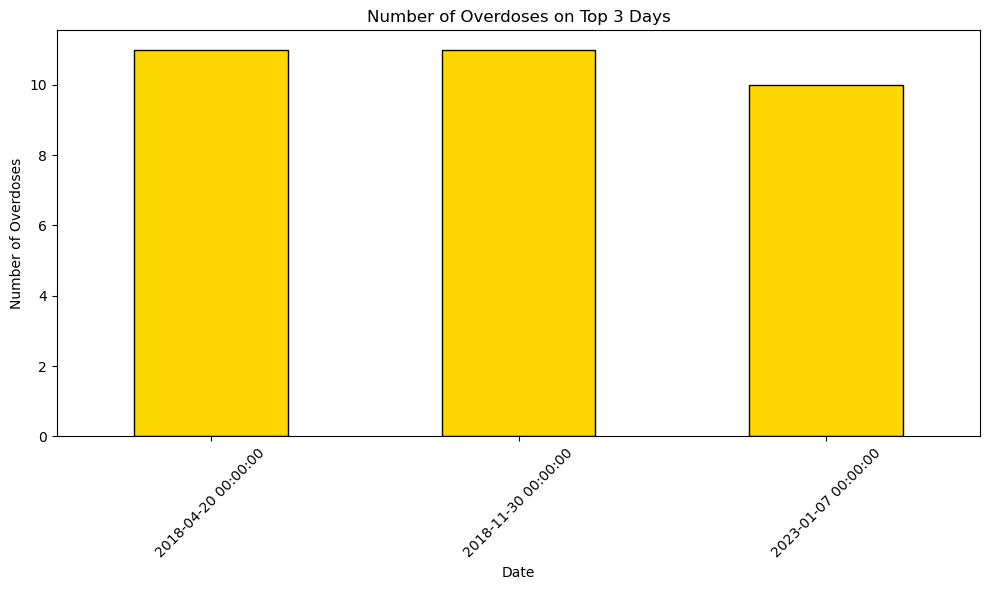

In [50]:
top_days_weather = df[df['date'].isin(top_days.index)][['date', 'tempmax', 'tempmin', 'temp', 'feelslike', 'precip', 'snow', 'cloudcover','day','preciptype']]

# Display the weather conditions for these days
top_days_weather

plt.figure(figsize=(10, 6))
top_days.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Number of Overdoses on Top 3 Days')
plt.xlabel('Date')
plt.ylabel('Number of Overdoses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
#The three days with the highest amount of OD were all on Friday and Saturday, it was chilly, and 2/3 it was snowing.

<Figure size 1400x700 with 0 Axes>

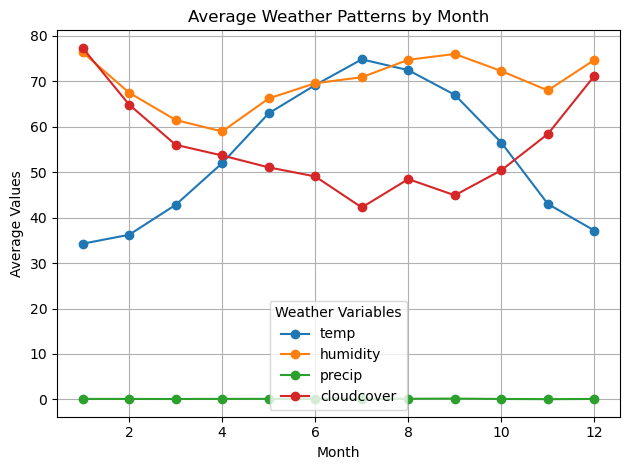

In [52]:

monthly_weather = df.groupby('month')[['temp', 'humidity', 'precip', 'cloudcover']].mean()


plt.figure(figsize=(14, 7))
monthly_weather.plot(kind='line', marker='o')
plt.title('Average Weather Patterns by Month')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.legend(title='Weather Variables')
plt.grid(True)
plt.tight_layout()
plt.show()


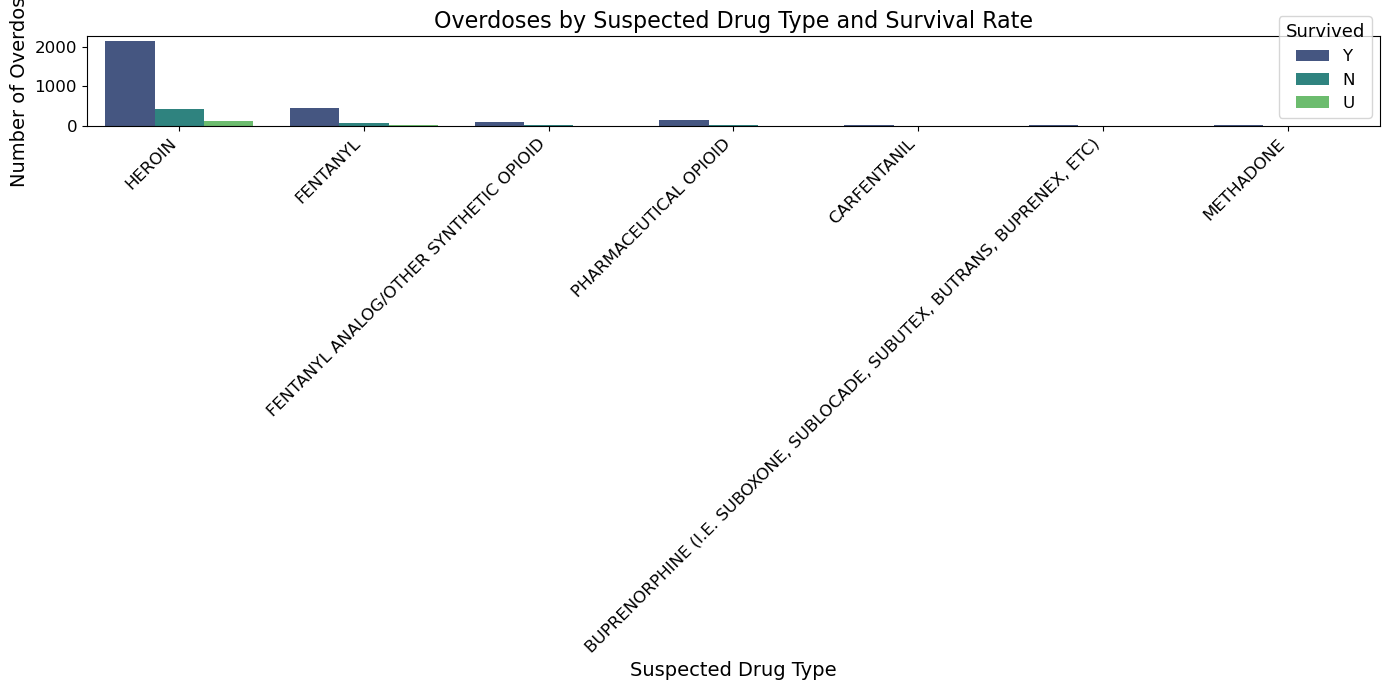

In [62]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='susp_od_drug_desc', hue='survive', palette='viridis')


plt.title('Overdoses by Suspected Drug Type and Survival Rate', fontsize=16)
plt.xlabel('Suspected Drug Type', fontsize=14)
plt.ylabel('Number of Overdoses', fontsize=14)
plt.legend(title='Survived', title_fontsize='13', fontsize='12')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

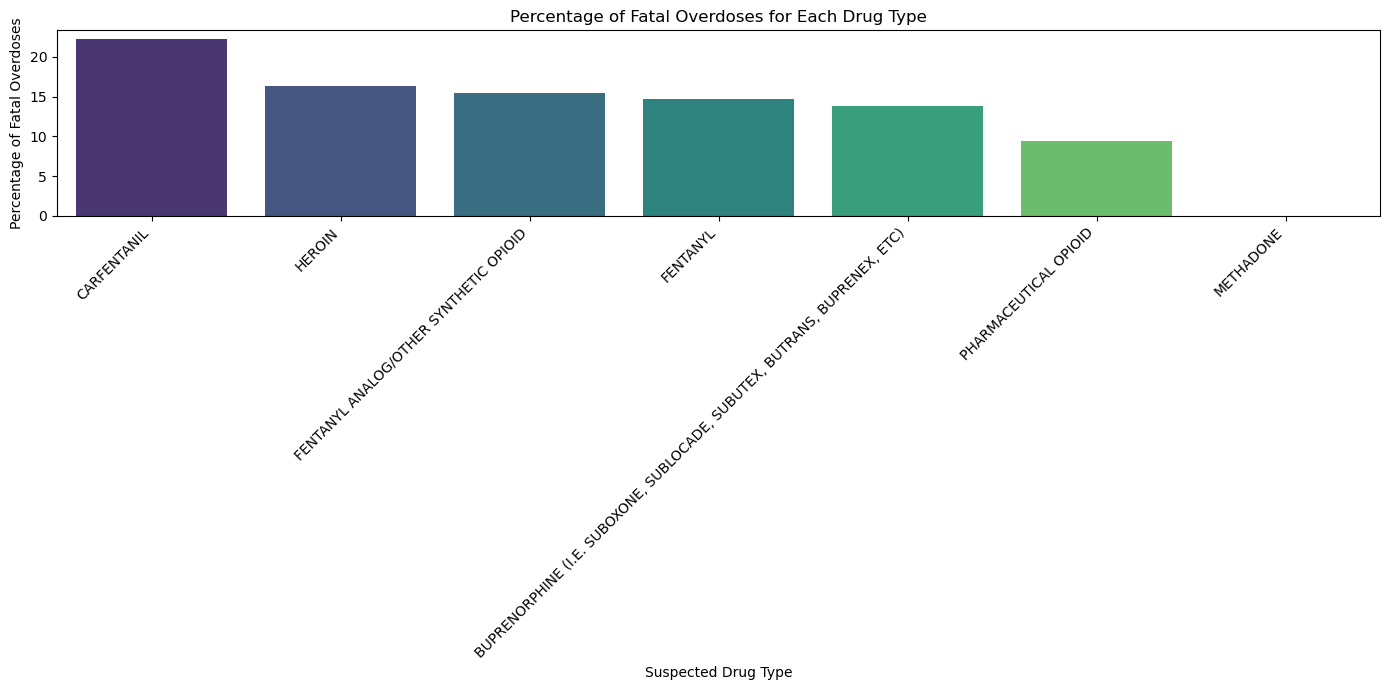

In [67]:
survival_counts = df.groupby('susp_od_drug_desc')['survive'].value_counts().unstack(fill_value=0)
survival_counts['Fatal Overdose Rate'] = survival_counts['N'] / (survival_counts['Y'] + survival_counts['N']) * 100


survival_counts = survival_counts.sort_values(by='Fatal Overdose Rate', ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(x=survival_counts.index, y=survival_counts['Fatal Overdose Rate'], palette='viridis')
plt.title('Percentage of Fatal Overdoses for Each Drug Type')
plt.xlabel('Suspected Drug Type')
plt.ylabel('Percentage of Fatal Overdoses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


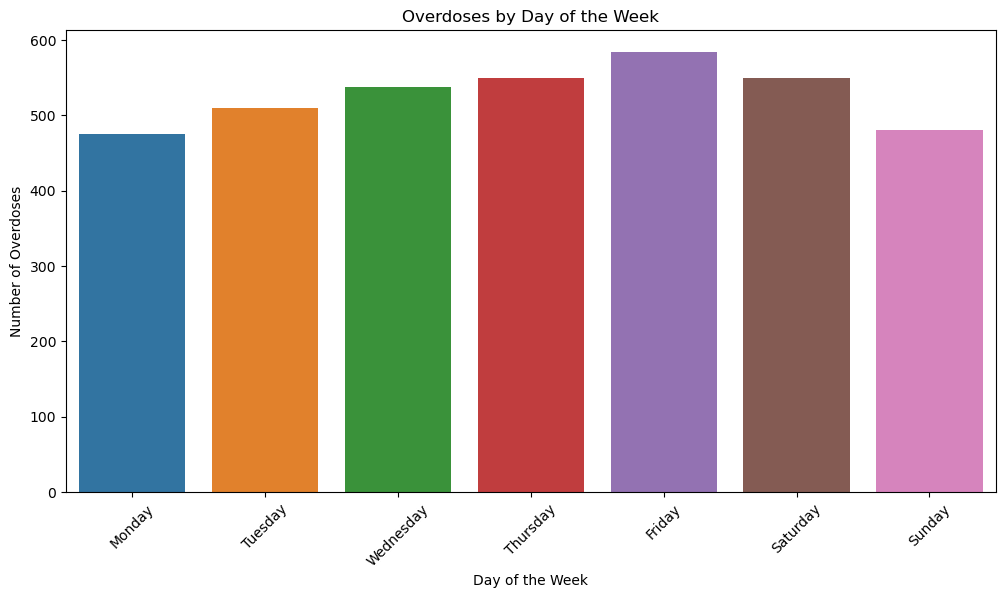

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Overdoses by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Overdoses')
plt.xticks(rotation=45)
plt.show()

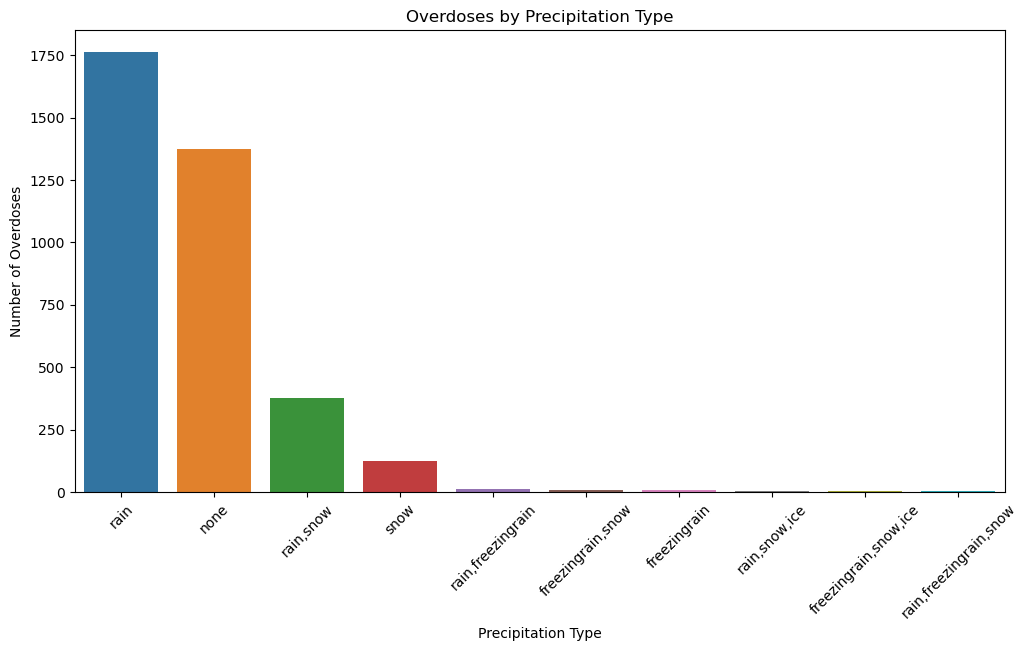

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='preciptype', order=df['preciptype'].value_counts().index)
plt.title('Overdoses by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Number of Overdoses')
plt.xticks(rotation=45)
plt.show()

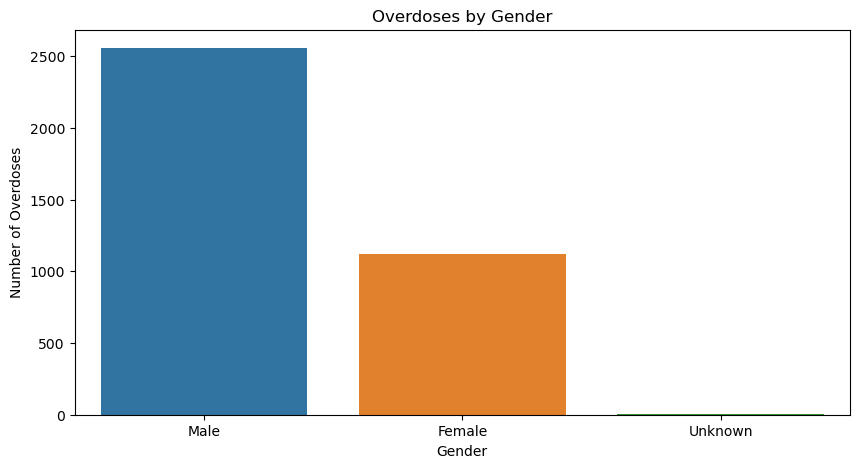

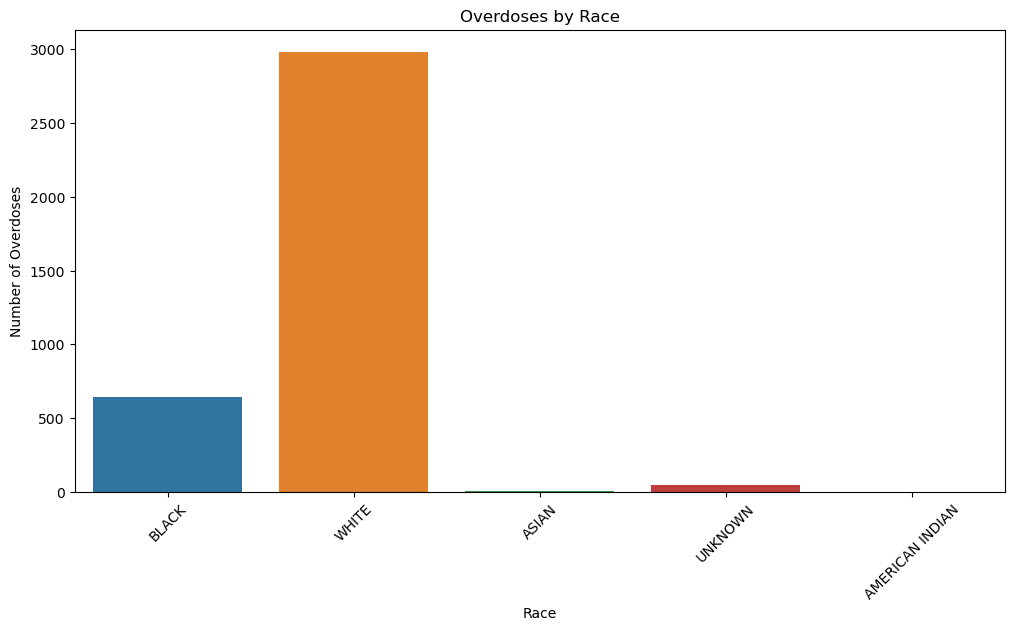

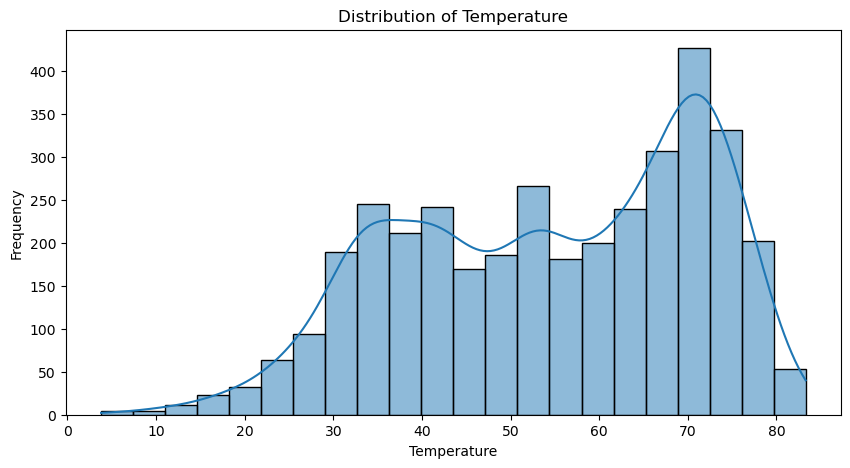

/Users/hunterberberich/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


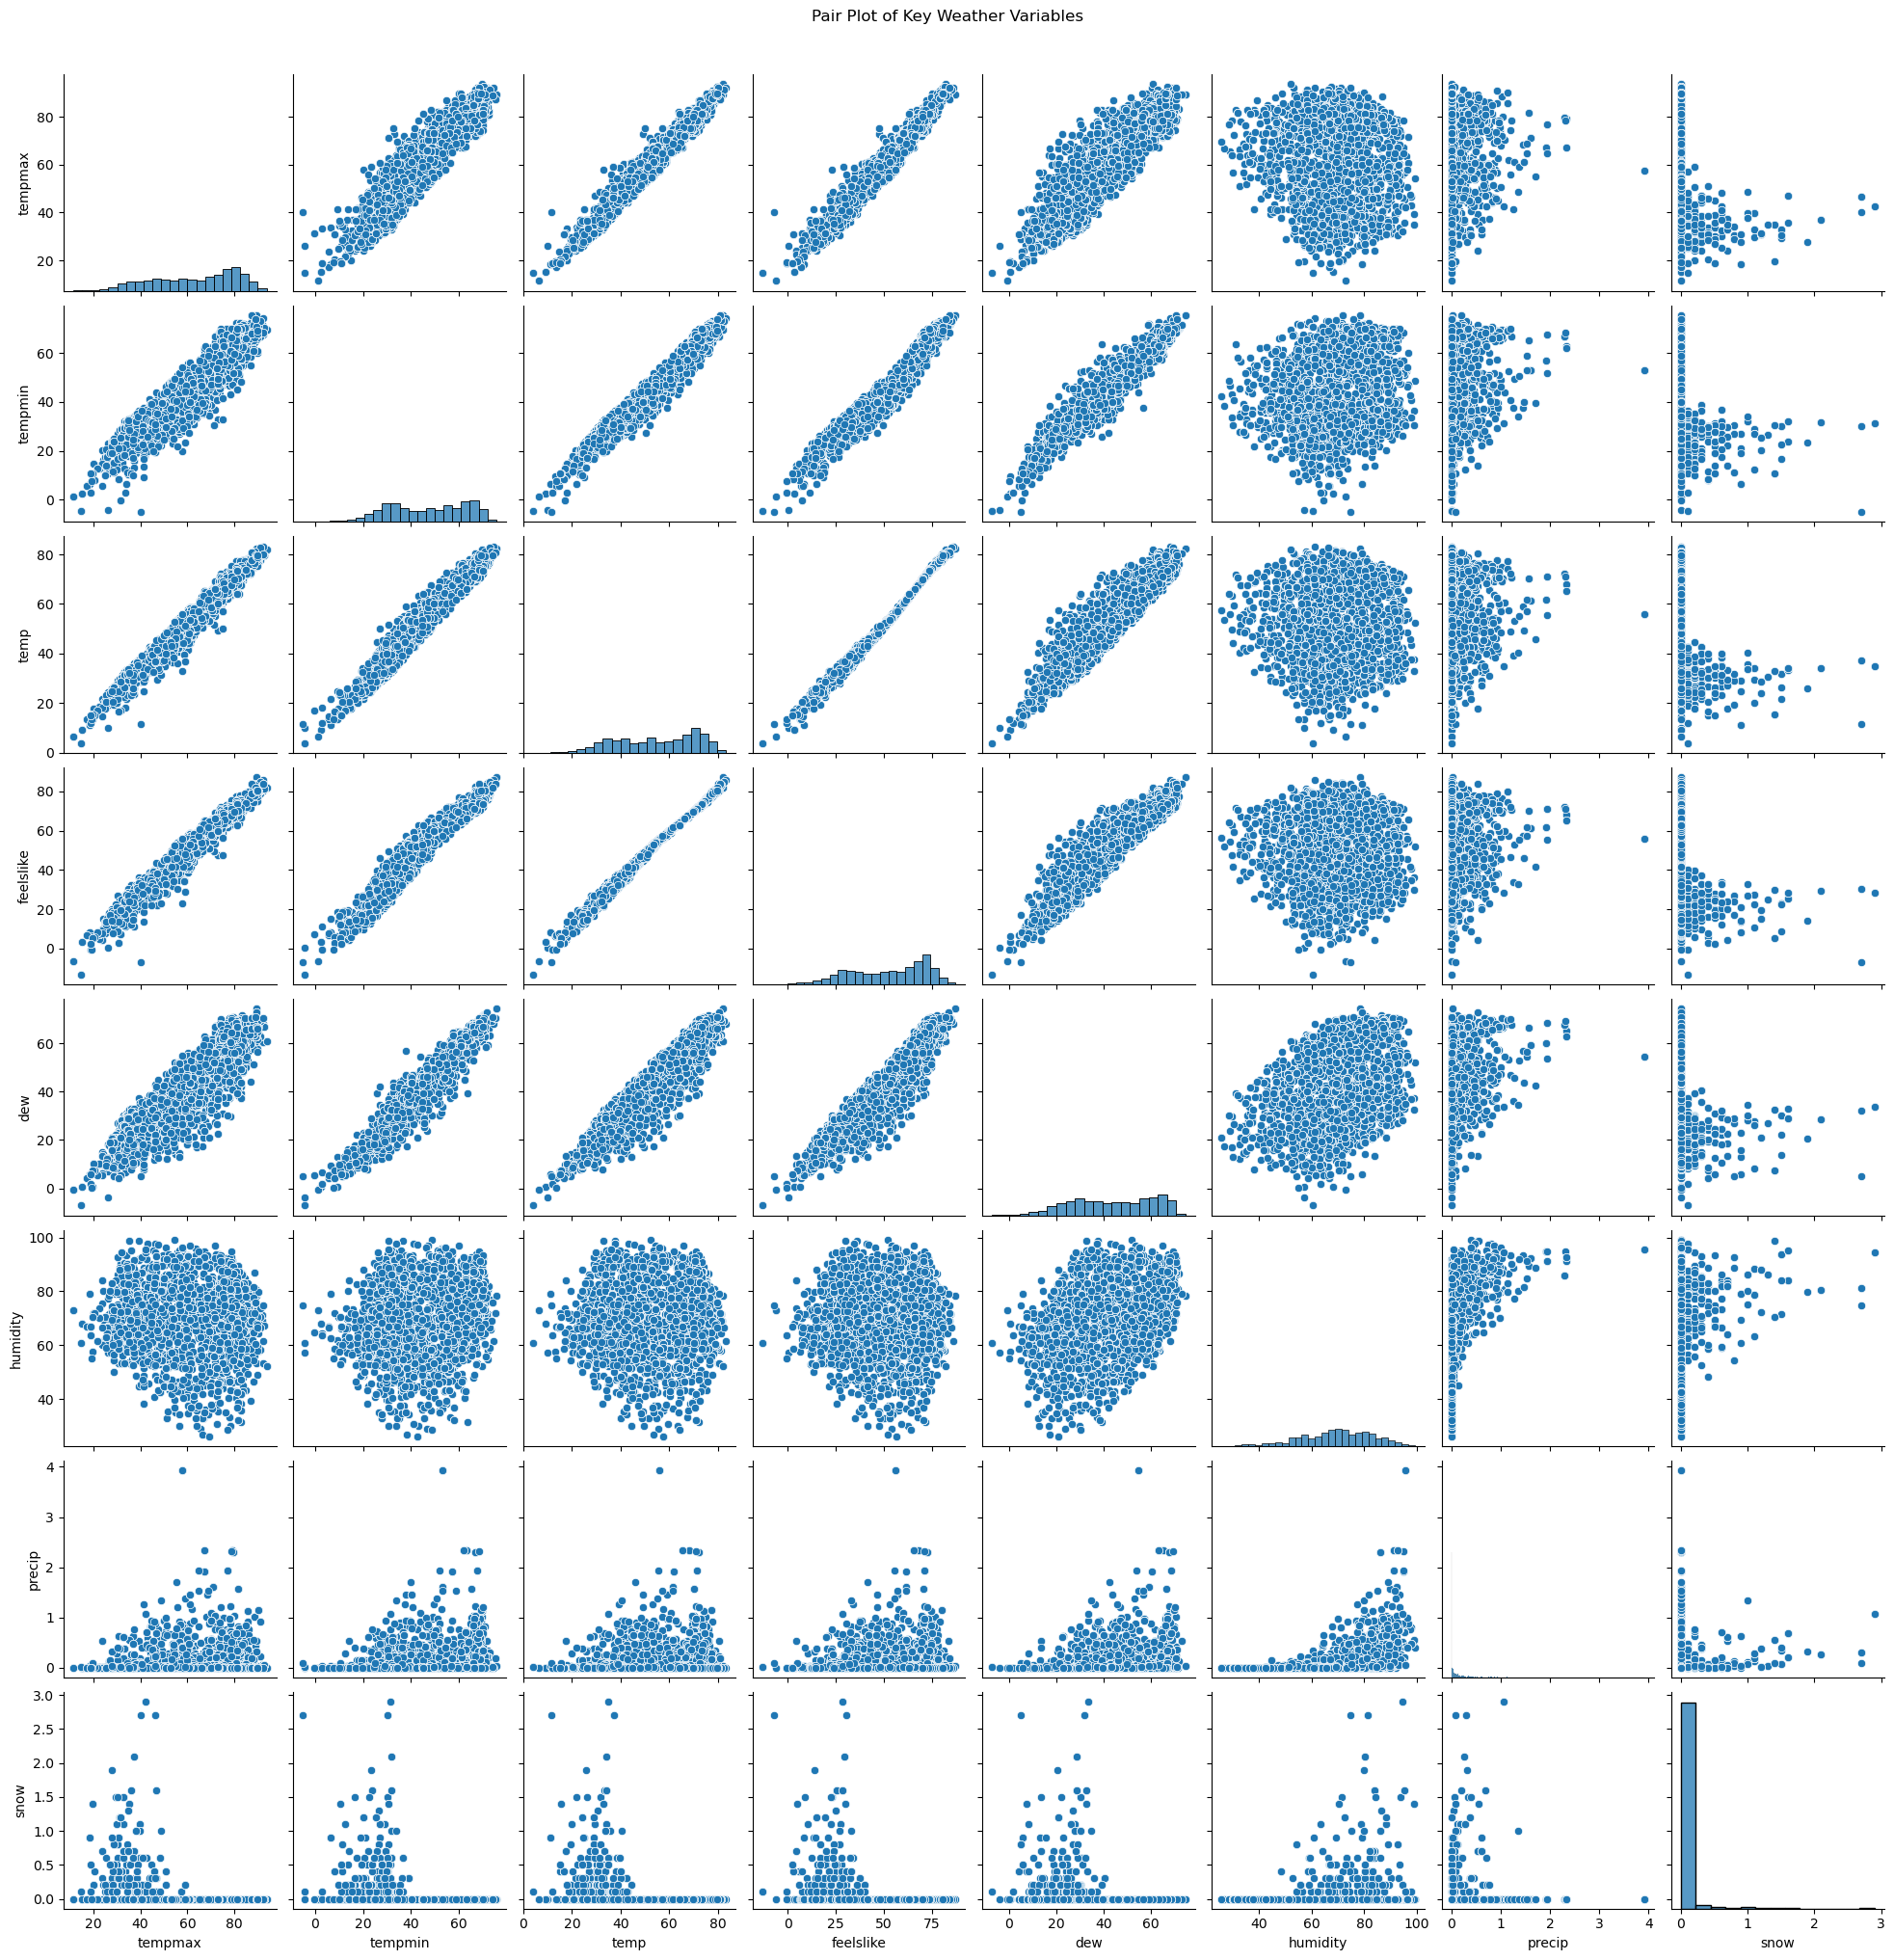

In [56]:
# Bar chart of overdoses by gender
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gender_desc')
plt.title('Overdoses by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Overdoses')
plt.show()

# Bar chart of overdoses by race
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race')
plt.title('Overdoses by Race')
plt.xlabel('Race')
plt.ylabel('Number of Overdoses')
plt.xticks(rotation=45)
plt.show()

# Distribution of temperature values
plt.figure(figsize=(10, 5))
sns.histplot(df['temp'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Pair plot of key weather variables
sns.pairplot(df[['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'snow']])
plt.suptitle('Pair Plot of Key Weather Variables', y=1.02)
plt.show()



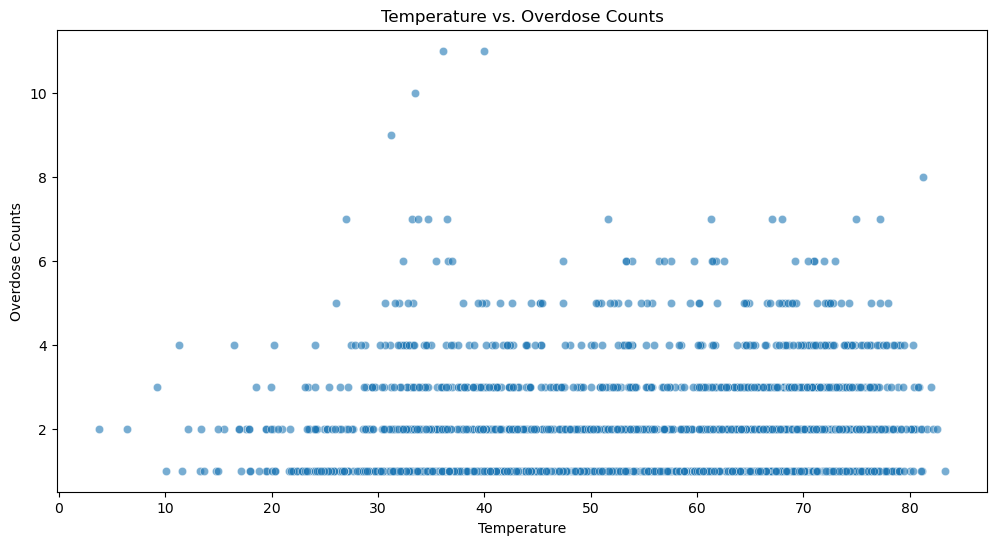

In [57]:

df_aggregated = df.groupby('date').size().reset_index(name='overdose_count')


df_merged = pd.merge(df_aggregated, df[['date', 'temp']], on='date', how='left').drop_duplicates()

# Scatter plot of temperature vs. overdose counts
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='temp', y='overdose_count', alpha=0.6)
plt.title('Temperature vs. Overdose Counts')
plt.xlabel('Temperature')
plt.ylabel('Overdose Counts')
plt.show()

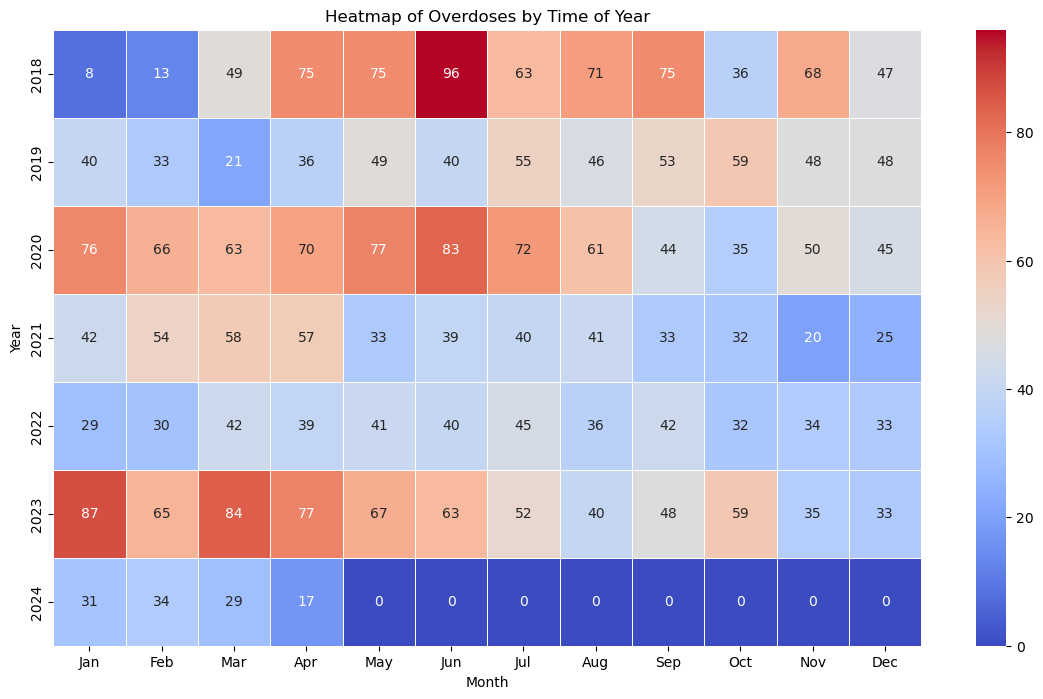

In [58]:

monthly_overdoses = df.groupby(['year', 'month']).size().reset_index(name='overdose_count')


monthly_overdoses_pivot = monthly_overdoses.pivot(index='year', columns='month', values='overdose_count').fillna(0)
monthly_overdoses_pivot.columns = [calendar.month_abbr[m] for m in monthly_overdoses_pivot.columns]


plt.figure(figsize=(14, 8))
sns.heatmap(monthly_overdoses_pivot, annot=True, fmt=".0f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Overdoses by Time of Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

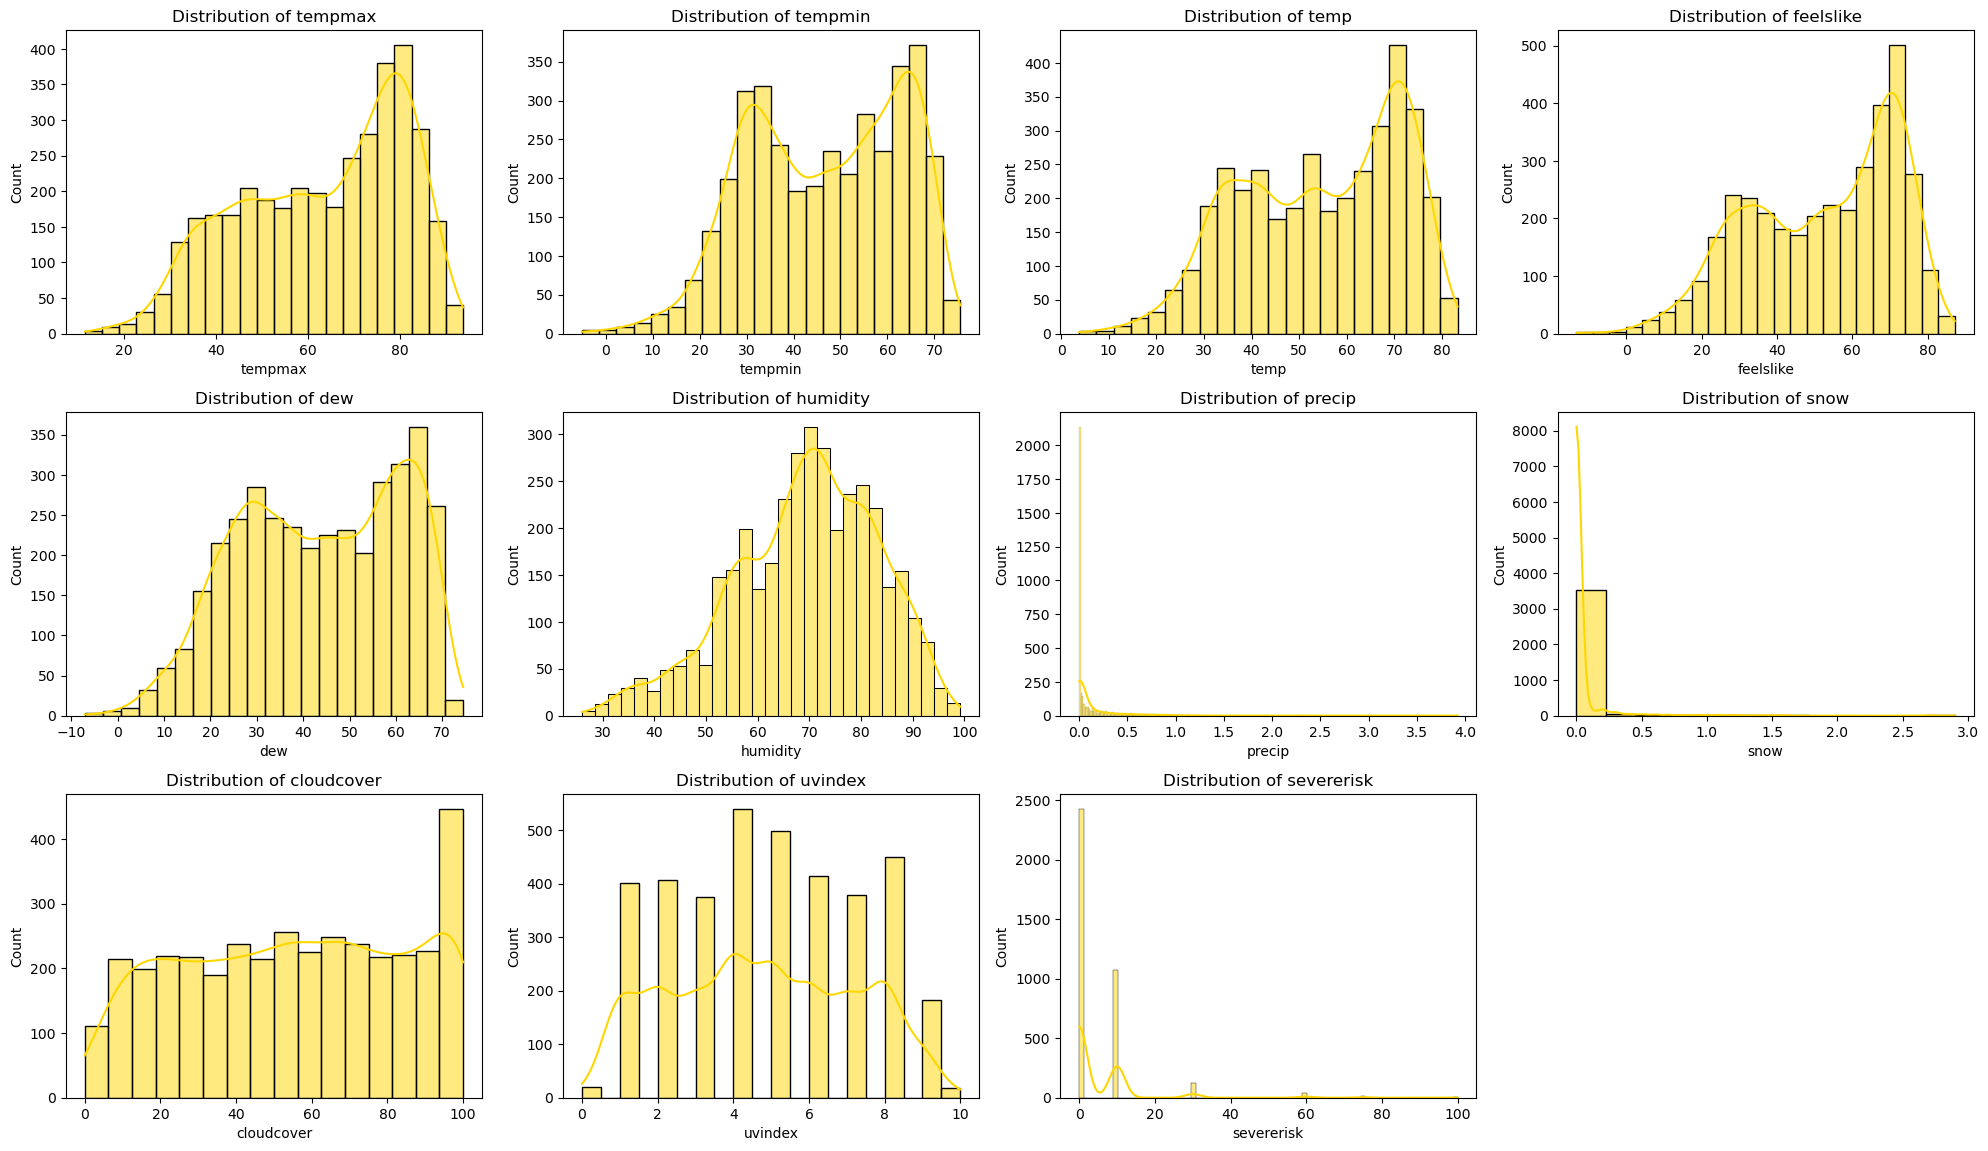

In [59]:


# Select weather-related columns
weather_columns = ['tempmax', 'tempmin', 'temp', 'feelslike', 'dew', 'humidity', 'precip', 'snow', 'cloudcover', 'uvindex', 'severerisk']
plt.figure(figsize=(20, 15))
for i, column in enumerate(weather_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True, color='#FFD700', edgecolor='black')  
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
sus